In [5]:
import pandas as pd

train = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('data/titanic/test.csv', index_col='PassengerId')

print(train.shape)
print(train.info())
train.head(3)

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [11]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# 성별 전처리

train_test_data = [train, test]

for data in train_test_data:
    data.loc[data['Sex'] == 'male', 'Sex'] = 0
    data.loc[data['Sex'] == 'female', 'Sex'] = 1
    
print(train['Sex'].value_counts())
print(test['Sex'].value_counts())

0    577
1    314
Name: Sex, dtype: int64
0    266
1    152
Name: Sex, dtype: int64


In [19]:
# 범주형 데이터 One-Hot Encoding
for data in train_test_data:
    data['Embarked_C'] = data['Embarked'] == 'C'
    data['Embarked_S'] = data['Embarked'] == 'S'
    data['Embarked_Q'] = data['Embarked'] == 'Q'
    
train[['Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [21]:
test[['Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


In [22]:
train.loc[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,False,False,False
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,False,False,False


In [25]:
#test.loc[test['Fare']]
test['Fare']

PassengerId
892       7.8292
893       7.0000
894       9.6875
895       8.6625
896      12.2875
          ...   
1305      8.0500
1306    108.9000
1307      7.2500
1308      8.0500
1309     22.3583
Name: Fare, Length: 418, dtype: float64

In [67]:
test.loc[test['Fare'].isnull(),'Fare'] = 0

In [89]:
test.loc[(test['Pclass'] == 3) & (test['Fare'] == 0), 'Fare'] = \
test.loc[test['Pclass'] == 3,'Fare'].unique().mean()

test.loc[test['Pclass'] == 3].tail(135)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,
1039,3,"Davies, Mr. Evan",0,22.00000,0,0,SC/A4 23568,8.050000,NaN,S,False,True,False
1043,3,"Matinoff, Mr. Nicola",0,30.27259,0,0,349255,7.895800,NaN,C,True,False,False
1044,3,"Storey, Mr. Thomas",0,60.50000,0,0,3701,14.787135,NaN,S,False,True,False
1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",1,36.00000,0,2,350405,12.183300,NaN,S,False,True,False
1046,3,"Asplund, Master. Filip Oscar",0,13.00000,4,2,347077,31.387500,NaN,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Henriksson, Miss. Jenny Lovisa",1,28.00000,0,0,347086,7.775000,NaN,S,False,True,False
1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.050000,NaN,S,False,True,False
1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,False,True,False


In [27]:
# Age(나이) - null data를 전체 나이의 평균값으로 치환
for data in train_test_data:
    mean_age = data['Age'].mean()
    print(mean_age)
    data.loc[data['Age'].isnull(), 'Age'] = mean_age

29.699117647058763
30.272590361445815


In [29]:
test.isnull().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin         327
Embarked        0
Embarked_C      0
Embarked_S      0
Embarked_Q      0
dtype: int64

In [30]:
%matplotlib inline 

import seaborn as sns

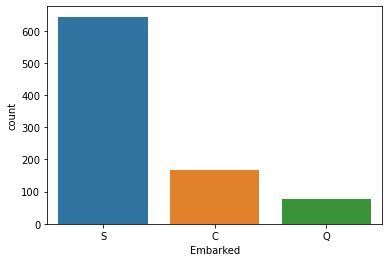

In [31]:
sns.countplot(data=train, x='Embarked')

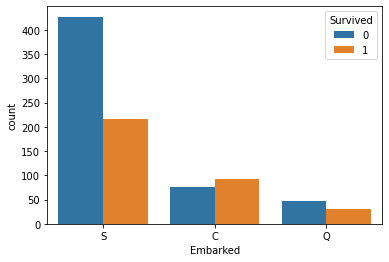

In [34]:
sns.countplot(data=train, x='Embarked', hue='Survived')

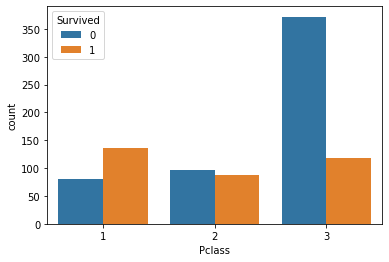

In [33]:
sns.countplot(data=train, x='Pclass', hue='Survived')

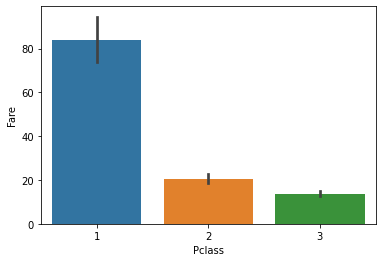

In [36]:
sns.barplot(data=train, x='Pclass', y='Fare')

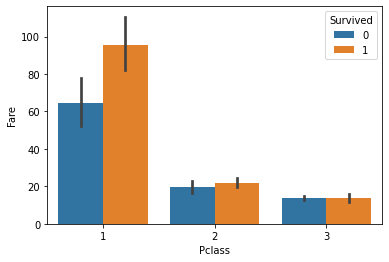

In [90]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

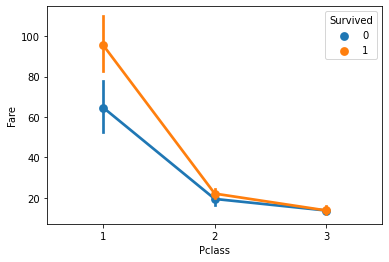

In [92]:
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


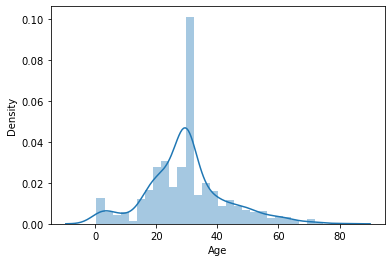

In [93]:
#Displot (히스토그램)
sns.distplot(train['Age'],hist=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


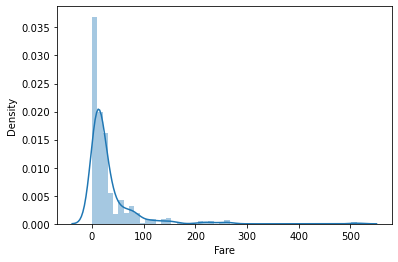

In [96]:
sns.distplot(train['Fare'],hist=True)

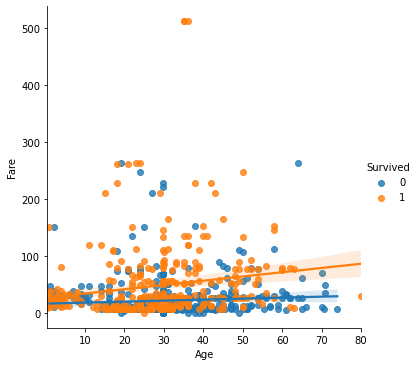

In [97]:
#Lmplot (산점도 + 회귀선)
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived', fit_reg=True)

In [117]:
print(train.columns)
feature_nm_org = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']
feature_nms = ['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']
feature_nms

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q'],
      dtype='object')


['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [118]:
train[feature_nms].head()

,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0,7.2500,False,True,False
2,1,1,71.2833,True,False,False
3,3,1,7.9250,False,True,False
4,1,1,53.1000,False,True,False
5,3,0,8.0500,False,True,False


In [119]:
train['Survived'].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train[feature_nms],\
                                                   train['Survived'], test_size=0.2,\
                                                   random_state=11)

model = DecisionTreeClassifier(random_state=11)
param_dict = {
    'max_depth':[2,3,5,10],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8]
}

grid = GridSearchCV(model, param_grid=param_dict, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
print('best parameter', grid.best_params_)
print('best score', grid.best_score_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

best parameter {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
best score 0.7935684034275584
0.8659217877094972


In [121]:
X_train = train[feature_nms]
y_train = train['Survived']

In [122]:
print(y_train.head())
X_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0,7.2500,False,True,False
2,1,1,71.2833,True,False,False
3,3,1,7.9250,False,True,False
4,1,1,53.1000,False,True,False
5,3,0,8.0500,False,True,False


In [123]:
X_test = test[feature_nms] # feature_nms : 독립변수 요소들


In [124]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

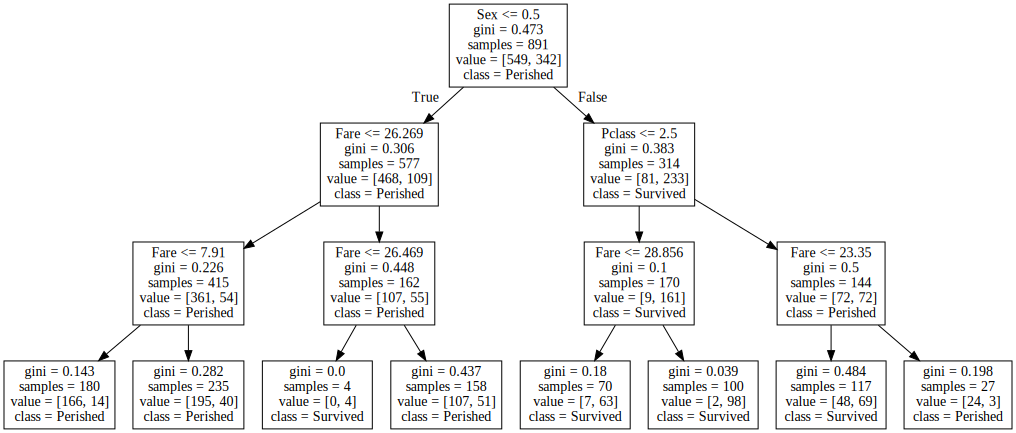

In [125]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, feature_names=feature_nms, \
               class_names=['Perished', 'Survived'], out_file='titanic.dot')

with open('titanic.dot') as file:
    dot_graph = file.read()
    
graphviz.Source(dot_graph)

In [126]:
predictions = model.predict(X_test)
predictions[0:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [127]:
submit = pd.read_csv('data/titanic/gender_submission.csv', index_col='PassengerId')
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [128]:
submit['Survived'] = predictions
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [129]:
submit.to_csv('data/titanic/result04.csv')